In [179]:
#importing required libraries
import pandas as pd
import os

In [180]:
#changing the working directory to where the dataset file is located
os.getcwd()
os.chdir("C:\\Users\\tusha\\OneDrive\\Desktop\\MPS_Alalytics\\Intro_analytics\\Projects")
#Reading the csv dataset into a dataframe
df=pd.read_csv("WALMART_SALES_DATA.csv")

In [182]:
#visualizing the dataframe
print(df)
print(len(df.index))

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    5/2/2010    1643690.90             0        42.31       2.572   
1         1   12/2/2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1    5/3/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45   5/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [183]:
# Dropping the rows with NULL values
new_df=df.dropna()
print(new_df)
print(len(new_df))

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1    5/2/2010    1643690.90             0        42.31       2.572   
1         1   12/2/2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1    5/3/2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45   5/10/2012     733455.07             0        64.89       3.985   
6432     45  12/10/2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     

In [184]:
#Converting the "Date" column from string to datetime data type
new_df["Date"]=pd.to_datetime(new_df["Date"])
print(new_df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358  

In [185]:
# Summary statistics of the dataframe
new_df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


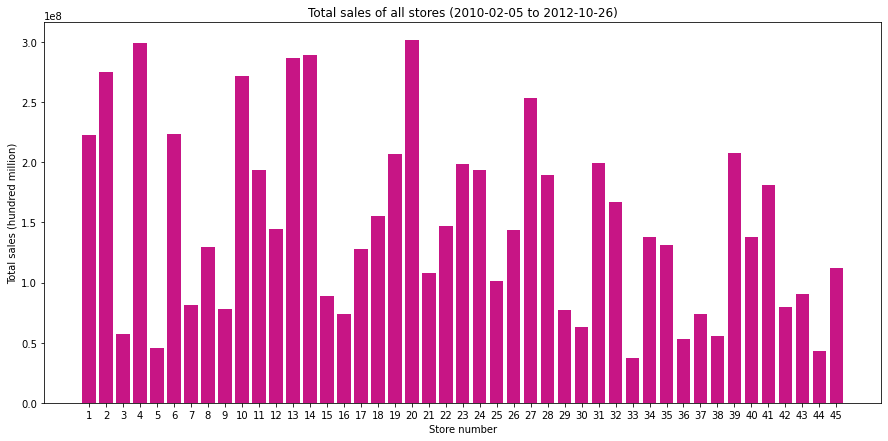

In [186]:
#importing matplotlib.pyplot library
import matplotlib.pyplot as plt
#Visualizing sum of sales of each store across the period 2010-02-05 to 2012-10-26
n_stores=[]
for i in range(1,46):
    n_stores.append(str(i))

total_sales=[]
for i in range(1,46):
    mask=new_df[new_df["Store"]==i]
    total_sales.append(sum(mask["Weekly_Sales"]))
fig=plt.figure(figsize=(15,7))
plt.bar(n_stores,total_sales,color="mediumvioletred")
plt.xlabel("Store number")
plt.ylabel("Total sales (hundred million)")
plt.title("Total sales of all stores (2010-02-05 to 2012-10-26)")
plt.show()

In [187]:
#Creating a new column that tells the difference in weekly sales for each store every week
new_df['diff_in_Weekly_Sales'] = new_df['Weekly_Sales'].shift(-1)-new_df['Weekly_Sales']
print(new_df)


      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  diff_in_Weekly_Sale

In [188]:
#total increase or decrease in weekly sales of each store after 2012-10-26
total_inc=[]
low=0
high=142
for i in range(1,46):
    #print(new_df["diff_in_Weekly_Sales"][low:high])
    total_inc.append(sum(new_df["diff_in_Weekly_Sales"][low:high]))
    low=low+143
    high=high+143
print(total_inc)
print(len(total_inc))

[-150031.15999999992, -302531.10999999987, -56189.51999999996, 14450.589999999851, 2377.670000000042, -221208.76, -1182.1600000000326, -112465.65000000002, 225.93999999994412, -448699.69999999995, -327279.18999999994, -125348.77000000014, 67969.12999999989, -919112.3300000001, -93648.83999999997, -1639.1600000000326, 154429.27000000002, -77791.25, -185519.20999999996, -369744.92000000016, -123391.01000000001, 61405.31999999995, -17266.98999999999, -81543.33999999985, 11709.30999999994, -75499.40999999992, -171242.05000000005, -458491.67999999993, -3663.7799999999115, -25684.02000000002, -129019.5, 132363.1000000001, -20862.29999999999, 758.8500000000931, -365475.9, -195057.33000000002, -1268.2999999999302, 58794.23999999999, 338905.19999999995, -80679.28000000003, 230009.41000000038, -28627.929999999993, -59425.72999999998, 79976.12, -130408.07999999996]
45


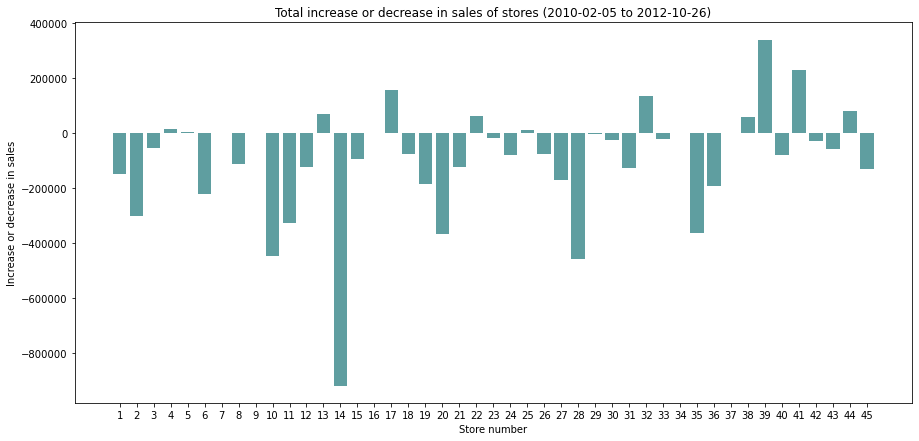

In [189]:
#Visualizing the total increase or decrease in sales of stores (2010-02-05 to 2012-10-26)
fig=plt.figure(figsize=(15,7))
plt.bar(n_stores,total_inc,color="cadetblue")
plt.xlabel("Store number")
plt.ylabel("Increase or decrease in sales")
plt.title("Total increase or decrease in sales of stores (2010-02-05 to 2012-10-26)")
plt.show()

In [190]:
#Creating a new column that store absolute values of difference in weekly sales
new_df["abs_diff"]=abs(new_df["diff_in_Weekly_Sales"])
print(new_df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1 2010-05-02    1643690.90             0        42.31       2.572   
1         1 2010-12-02    1641957.44             1        38.51       2.548   
2         1 2010-02-19    1611968.17             0        39.93       2.514   
3         1 2010-02-26    1409727.59             0        46.63       2.561   
4         1 2010-05-03    1554806.68             0        46.50       2.625   
...     ...        ...           ...           ...          ...         ...   
6430     45 2012-09-28     713173.95             0        64.88       3.997   
6431     45 2012-05-10     733455.07             0        64.89       3.985   
6432     45 2012-12-10     734464.36             0        54.47       4.000   
6433     45 2012-10-19     718125.53             0        56.47       3.969   
6434     45 2012-10-26     760281.43             0        58.85       3.882   

             CPI  Unemployment  diff_in_Weekly_Sale

In [192]:
import numpy
mean_diff=[]
low=0
high=142
for i in range(1,46):
    #print(new_df["abs_diff"][low:high])
    mean_diff.append(numpy.mean(new_df["abs_diff"][low:high]))
    low=low+143
    high=high+143
print(mean_diff)
print(len(mean_diff))

[121093.91098591546, 139662.33035211262, 28724.50873239436, 146411.49457746476, 25402.804014084515, 128102.8295774648, 52969.37549295776, 67887.94964788738, 40521.34647887325, 140314.4102816901, 105437.72387323948, 77047.78866197185, 146975.4879577464, 186900.10161971833, 61218.46774647887, 42534.45704225354, 80311.51626760559, 104405.7775352113, 117595.08683098588, 177259.92633802813, 64131.5213380282, 90601.99098591547, 138005.66626760564, 122590.62901408454, 51020.3703521127, 83062.3257042253, 150358.39345070414, 174177.20450704225, 57257.00802816901, 16529.6656338028, 84070.42140845068, 74208.0750704226, 20714.43169014084, 64679.41542253521, 98865.51154929583, 18993.650492957757, 20042.608591549302, 27640.049154929588, 113839.93140845063, 89465.03563380278, 99270.21908450707, 52922.364859154935, 36502.0473943662, 14048.03436619718, 68320.84140845075]
45


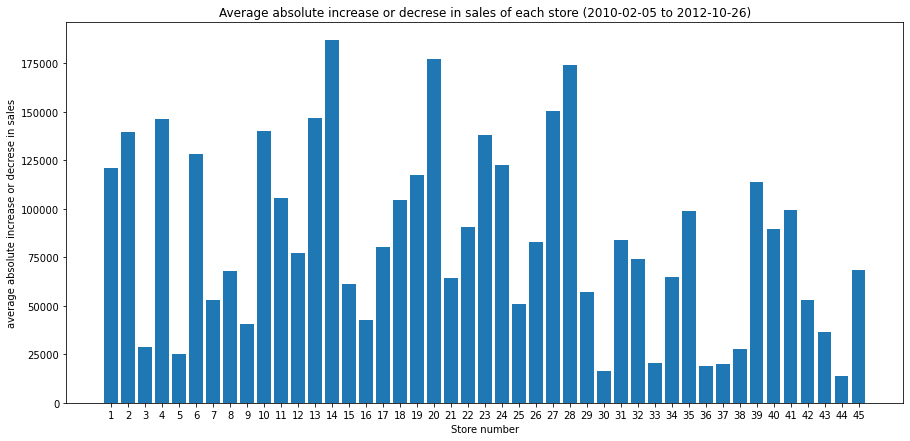

In [193]:
fig=plt.figure(figsize=(15,7))

plt.bar(n_stores,mean_diff)

plt.xlabel("Store number")

plt.ylabel("average absolute increase or decrese in sales")

plt.title("Average absolute increase or decrese in sales of each store (2010-02-05 to 2012-10-26)")

plt.show()

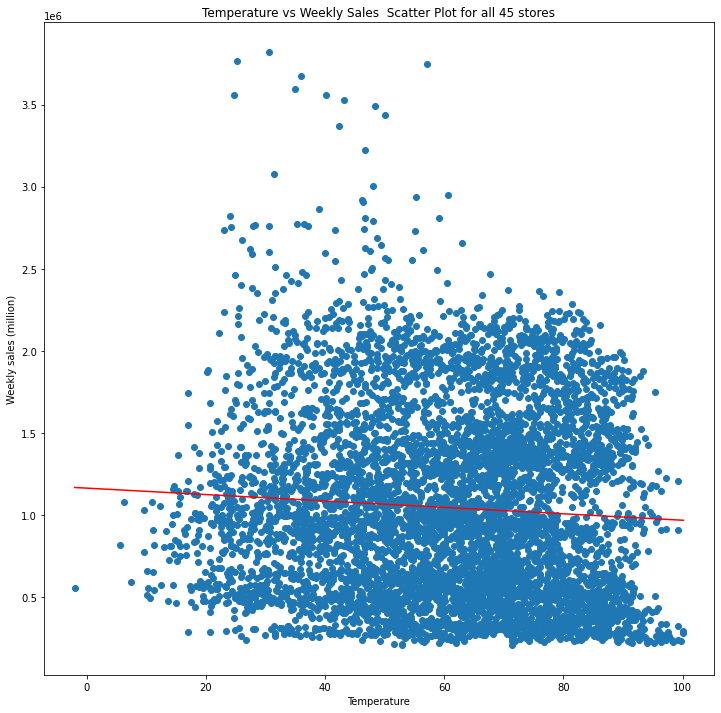

In [194]:
fig=plt.figure(figsize=(12,12))
plt.scatter(new_df["Temperature"],new_df["Weekly_Sales"])
plt.xlabel("Temperature")
plt.ylabel("Weekly sales (million)")
plt.title("Temperature vs Weekly Sales  Scatter Plot for all 45 stores")
plt.plot(numpy.unique(new_df["Temperature"]), numpy.poly1d(numpy.polyfit(new_df["Temperature"],new_df["Weekly_Sales"], 1))
         (numpy.unique(new_df["Temperature"])), color='red')


In [195]:
new_df.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,diff_in_Weekly_Sales,abs_diff
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531,0.000306,-0.098836
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176,-0.165770,0.434496
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960,-0.130163,0.066766
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158,0.006131,-0.193184
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684,0.013188,-0.023624
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020,-0.001009,-0.050195
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000,-0.002901,-0.010600
diff_in_Weekly_Sales,3.059801e-04,-0.165770,-1.301627e-01,0.006131,0.013188,-0.001009,-0.002901,1.000000,-0.217973
abs_diff,-9.883600e-02,0.434496,6.676581e-02,-0.193184,-0.023624,-0.050195,-0.010600,-0.217973,1.000000
